# Multiple Linear Regression
## Bike Sharing Case Study



## Step 1: Fetching & Understanding the Data

In [204]:

# Let us  import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [205]:
#Load Dataset
bikeSharing = pd.read_csv("day.csv")
#Display  Overview of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the dataframe to get insight

In [206]:
bikeSharing.shape

(730, 16)

In [207]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [208]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [209]:
#checking for null values in dataset
count=bikeSharing.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Step 2: Data Preparation

- You can see that your dataset has many insignificant columns. We will drop following columns:
- instant' is an index column.
- Column 'dteday' because yr and month represents similar information.
- Casual, Registered as their sum is present in 'cnt'.cnt is our target variable.

In [210]:
# As 'instant' is an index column,so we will drop it
bikeSharing.drop(['instant'],axis=1,inplace=True)

In [211]:
# Check the dataframe now

bikeSharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [212]:
# Drop and check columns
bikeSharing.drop(['dteday','casual','registered'],axis=1,inplace=True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data conversion
- Season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables containing numeric representations.Hence, we need to convert them in categorical values to create dummy variables for them.
- We will replace season,weekday and weathersit with appropriate values.

In [213]:
bikeSharing['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [214]:
bikeSharing['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [215]:
bikeSharing['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [216]:
bikeSharing['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [217]:
# ReNaming categorical variables for better representation, based on Data dictionary and assumption.
bikeSharing['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikeSharing['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm"},inplace=True)
bikeSharing['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikeSharing['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [218]:
bikeSharing['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [219]:
bikeSharing['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [220]:
bikeSharing['weathersit'].value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light rain_Light snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [222]:
bikeSharing['weekday'].value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [223]:
#Changing datatypes of numerical variables to appropriate types
bikeSharing[['temp','atemp','hum','windspeed','cnt']]=bikeSharing[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3:  Data Visualization

Let get **understanding of the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### Numeric Variables Visualization

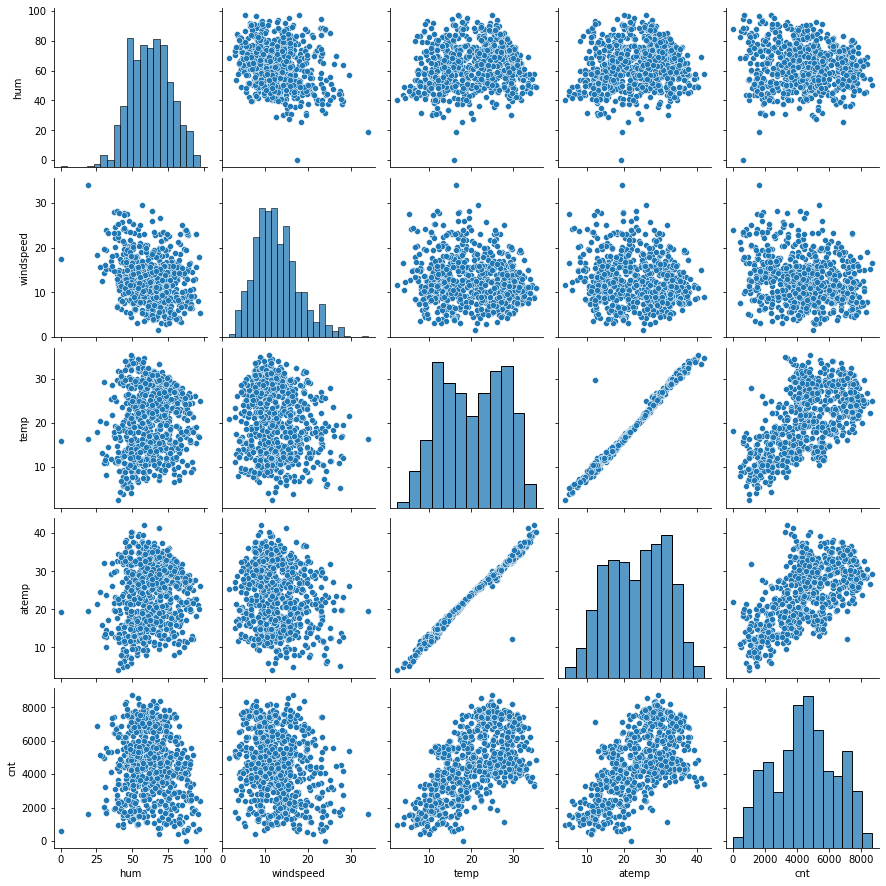

In [224]:
#Let's visualize through pairplot of all the numeric variables
sns.pairplot(bikeSharing, vars=['hum','windspeed','temp','atemp','cnt'])
plt.show()

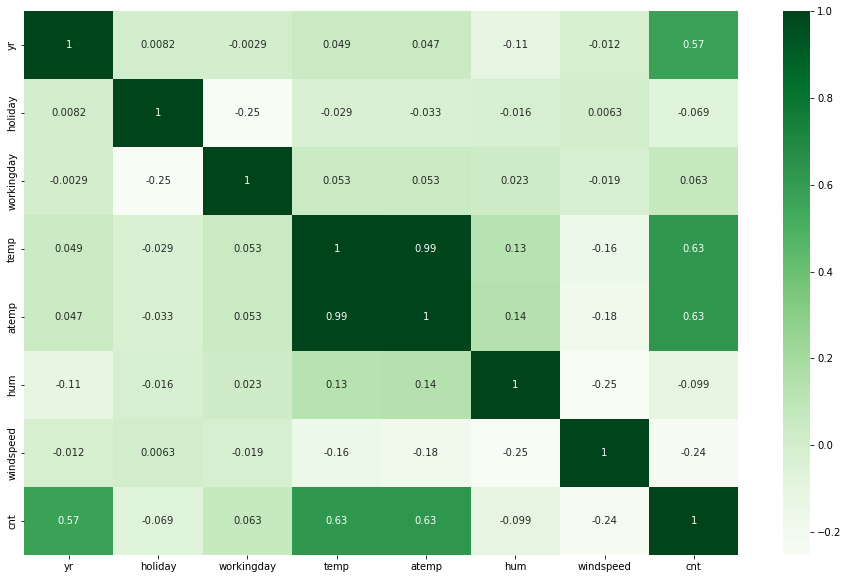

In [73]:
#Check Correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bikeSharing.corr(), annot = True, cmap="Greens")
plt.show()

### Observations:
- High correlation between temp and atemp (0.99 which is almost 1).

In [225]:
#Due to high collinearity, We will drop temp and will keep atemp
bikeSharing.drop(['temp'],axis=1,inplace=True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

As there are a few categorical variables as well. Let's make a boxplot for some of these variables.

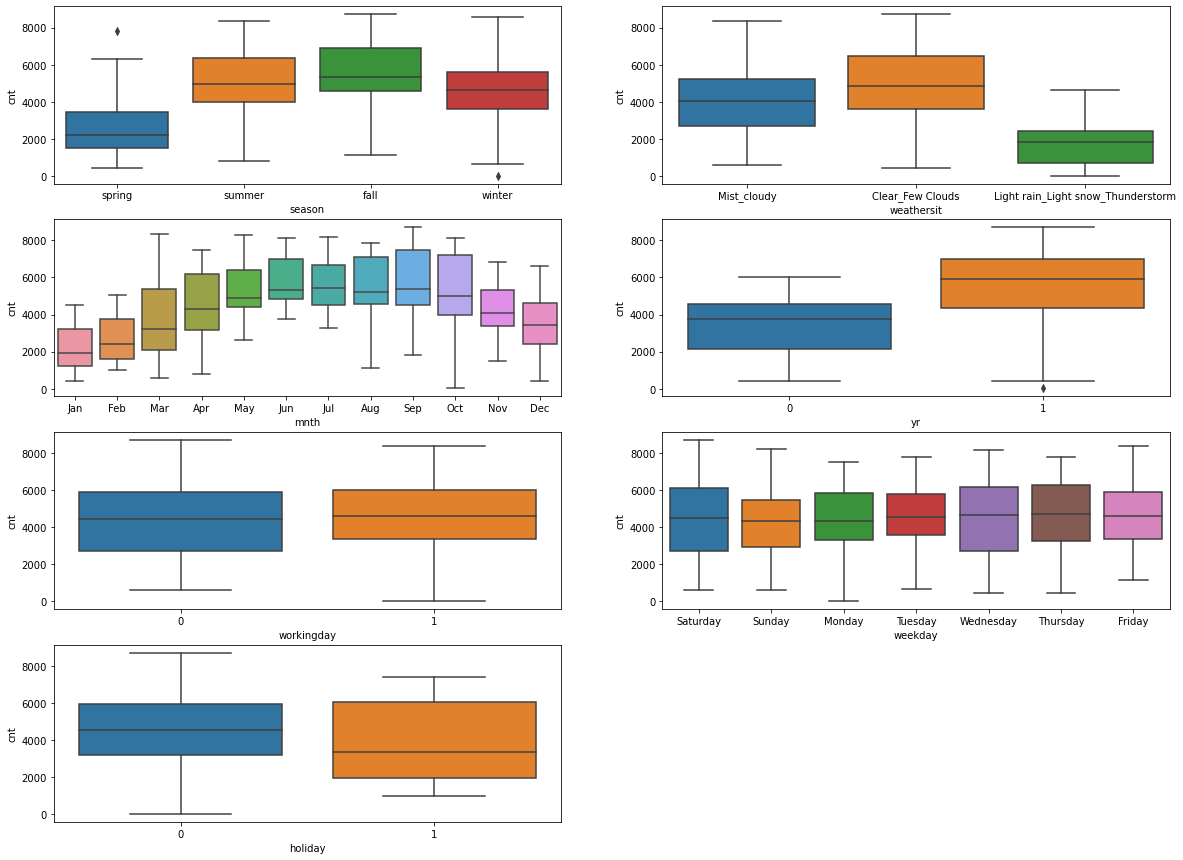

In [226]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)
plt.show()

### Creating Dummy Variables
- In order to fit a regression line, we would need numerical values instead of categorical values. 


In [227]:
#Variables conversion
bikeSharing['mnth']=bikeSharing['mnth'].astype(object)
bikeSharing['season']=bikeSharing['season'].astype(object)
bikeSharing['weathersit']=bikeSharing['weathersit'].astype(object)
bikeSharing['weekday']=bikeSharing['weekday'].astype(object)
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [228]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [229]:
# Get the dummy variables for the features and store these in a new variables
Season_condition=pd.get_dummies(bikeSharing['season'],drop_first=True)
Weather_condition=pd.get_dummies(bikeSharing['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(bikeSharing['weekday'],drop_first=True)
Month=pd.get_dummies(bikeSharing['mnth'],drop_first=True)

In [230]:
# Let's concate these dummy variables in bikeSharing dataset
bikeSharing=pd.concat([bikeSharing,Season_condition],axis=1)
bikeSharing=pd.concat([bikeSharing,Weather_condition],axis=1)
bikeSharing=pd.concat([bikeSharing,Day_of_week],axis=1)
bikeSharing=pd.concat([bikeSharing,Month],axis=1)
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [231]:
# Check what the dataset looks like now
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


- Now, you don't need Original columns as we have created dummy columns for them. 
We will drop the originals.

In [232]:
# Drop 'season' , 'weathersit', 'weekday','mnth'as we have created the dummies for these.
bikeSharing.drop(['season'], axis = 1, inplace = True)
bikeSharing.drop(['weathersit'], axis = 1, inplace = True)
bikeSharing.drop(['weekday'], axis = 1, inplace = True)
bikeSharing.drop(['mnth'], axis = 1, inplace = True)

In [233]:
bikeSharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Train and Test Sets

In [284]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [285]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
367,1,0,1,6.31375,44.1250,24.499957,2236,1,0,0,...,0,0,1,0,0,0,0,0,0,0
648,1,0,1,21.55835,46.3333,12.166932,7570,0,0,1,...,0,0,0,0,0,0,0,0,1,0
44,0,0,1,19.91750,37.5833,27.999836,1913,1,0,0,...,0,1,0,0,0,0,0,0,0,0
705,1,0,1,16.09790,76.4167,8.750200,5008,0,0,1,...,1,0,0,0,0,0,0,0,0,0
379,1,0,0,8.08125,41.9167,16.834286,2311,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [286]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Features Rescaling 

- It is very crucialto rescale the features so that they have a comparable scale. 
- Scaling doesn't impact our model. 
- Advised scaling techniques:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, I have used MinMax scaling.

In [287]:
#importing SCaler library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [288]:
# Apply scaler() to all the Numeric Features
numVariables = ['atemp','hum','windspeed']

df_train[numVariables] = scaler.fit_transform(df_train[numVariables])

In [290]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
367,1,0,1,0.061963,0.454701,0.695175,2236,1,0,0,...,0,0,1,0,0,0,0,0,0,0
648,1,0,1,0.462175,0.477458,0.299450,7570,0,0,1,...,0,0,0,0,0,0,0,0,1,0
44,0,0,1,0.419099,0.387290,0.807474,1913,1,0,0,...,0,1,0,0,0,0,0,0,0,0
705,1,0,1,0.318824,0.787463,0.189819,5008,0,0,1,...,1,0,0,0,0,0,0,0,0,0
379,1,0,0,0.108365,0.431945,0.449210,2311,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [291]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.513175,0.649499,0.319463,4505.267123,0.251712,0.246575,0.250000,...,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479
std,0.500241,0.163378,0.471403,0.211663,0.144219,0.168114,1958.617712,0.434369,0.431387,0.433384,...,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331819,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530558,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.690521,0.752361,0.410413,6035.750000,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [292]:
y_train = df_train.pop('cnt')
X_train = df_train

In [293]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
367,1,0,1,0.061963,0.454701,0.695175,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
648,1,0,1,0.462175,0.477458,0.299450,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
44,0,0,1,0.419099,0.387290,0.807474,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
705,1,0,1,0.318824,0.787463,0.189819,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
379,1,0,0,0.108365,0.431945,0.449210,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [294]:
y_train.head()

367    2236
648    7570
44     1913
705    5008
379    2311
Name: cnt, dtype: int64

## Step 5: Building a linear model

First Fit a regression line through the training data using `sklearn` and Recursive Feature Elimination. 

#### Using  Automated Recursive Feature Elimination Technique- sklearn

In [295]:
#import Lib
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [296]:
#Initializing
lm = LinearRegression()
# Training Model
lm.fit(X_train, y_train)

LinearRegression()

In [297]:
# Selecting Features using RFE. We have selected here 15 features
rfe = RFE(lm, 15,step=1)            
rfe = rfe.fit(X_train, y_train)

In [298]:
#Checking support for features
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True])

In [299]:
#Checking Ranking
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  9,  1,  8, 12, 10, 13,
        3,  1,  4,  1,  7,  5, 14,  6,  1, 11,  1])

In [253]:
#Combining and Checking Support and Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', False, 7),
 ('Jun', False, 5),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [300]:
# Checking Unsupported Features data Set
X_train.columns[~rfe.support_]

Index(['summer', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug',
       'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [301]:
# Retrieving supported Features data Set
col = X_train.columns[rfe.support_]
X_train_rfe=X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Saturday,Dec,Jan,Nov,Sep
367,1,0,1,0.061963,0.454701,0.695175,1,0,0,0,0,0,1,0,0
648,1,0,1,0.462175,0.477458,0.299450,0,1,0,0,0,0,0,0,0
44,0,0,1,0.419099,0.387290,0.807474,1,0,0,0,0,0,0,0,0
705,1,0,1,0.318824,0.787463,0.189819,0,1,0,1,0,1,0,0,0
379,1,0,0,0.108365,0.431945,0.449210,1,0,0,0,0,0,1,0,0


#### Using  Manual Features Removal Technique - statsmodels

In [302]:
#Import lib
import statsmodels.api as sm


In [303]:
# Add a constant as stats model by deafult have 0 incercept.
X_train_lm = sm.add_constant(X_train_rfe)

In [304]:
# Model Fitting
lm1 = sm.OLS(y_train,X_train_lm).fit()

In [305]:
# Check the parameters obtained
lm1.params

const                                 2887.217070
yr                                    2007.999141
holiday                               -391.768939
workingday                             459.490391
atemp                                 3484.797661
hum                                  -1078.063967
windspeed                            -1392.520193
spring                               -1028.179101
winter                                 656.514296
Light rain_Light snow_Thunderstorm   -2324.990975
Mist_cloudy                           -516.250859
Saturday                               531.561013
Dec                                   -553.005573
Jan                                   -493.298007
Nov                                   -596.513894
Sep                                    517.252899
dtype: float64

In [260]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.21e-220
Time:                        09:05:54   Log-Likelihood:                -4705.2
No. Observations:                 584   AIC:                             9442.
Df Residuals:                     568   BIC:                             9512.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Removing another variable
- Let's Test Multicolinearity to decide which fetaure to eliminate


In [261]:
#import Lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [306]:
# Define function to check VIF in Train set
def checkVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [307]:
checkVIF(X_train_rfe)

                              Features    VIF
4                                  hum  25.64
3                                atemp  15.68
2                           workingday   4.99
5                            windspeed   4.19
6                               spring   3.01
7                               winter   2.72
9                          Mist_cloudy   2.30
0                                   yr   2.07
10                            Saturday   1.90
13                                 Nov   1.73
12                                 Jan   1.70
11                                 Dec   1.52
8   Light rain_Light snow_Thunderstorm   1.23
1                              holiday   1.20
14                                 Sep   1.18


- Let's drop Column 'hum' as it has veru high VIF and retrain the model

In [308]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [309]:
#Retrain model 
X_train_lm2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     220.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.14e-219
Time:                        09:46:52   Log-Likelihood:                -4711.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     569   BIC:                             9518.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [310]:
#Check VIF Again
checkVIF(X_train_rfe)

                              Features   VIF
3                                atemp  5.70
2                           workingday  4.86
4                            windspeed  4.16
5                               spring  2.46
6                               winter  2.37
0                                   yr  2.07
9                             Saturday  1.88
12                                 Nov  1.70
11                                 Jan  1.63
8                          Mist_cloudy  1.53
10                                 Dec  1.44
1                              holiday  1.19
13                                 Sep  1.17
7   Light rain_Light snow_Thunderstorm  1.08


- Let's drop Column 'atemp' as it has veru high VIF and retrain the model

In [311]:
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)
#train model 
X_train_lm3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.29e-190
Time:                        09:47:11   Log-Likelihood:                -4782.6
No. Observations:                 584   AIC:                             9593.
Df Residuals:                     570   BIC:                             9654.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [312]:
#Check VIF Again
checkVIF(X_train_rfe)

                              Features   VIF
3                            windspeed  3.60
2                           workingday  3.27
5                               winter  2.36
4                               spring  2.25
0                                   yr  1.90
11                                 Nov  1.68
10                                 Jan  1.60
8                             Saturday  1.55
7                          Mist_cloudy  1.52
9                                  Dec  1.42
1                              holiday  1.14
12                                 Sep  1.14
6   Light rain_Light snow_Thunderstorm  1.08


### 'winter' has high p value, so now let's drop it.

In [313]:
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)
#train model 
X_train_lm4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.08e-191
Time:                        09:47:39   Log-Likelihood:                -4783.3
No. Observations:                 584   AIC:                             9593.
Df Residuals:                     571   BIC:                             9649.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [314]:
#Check VIF Again
checkVIF(X_train_rfe)

                              Features   VIF
3                            windspeed  3.59
2                           workingday  3.20
4                               spring  2.07
0                                   yr  1.89
9                                  Jan  1.59
7                             Saturday  1.53
6                          Mist_cloudy  1.51
1                              holiday  1.14
8                                  Dec  1.14
10                                 Nov  1.14
11                                 Sep  1.13
5   Light rain_Light snow_Thunderstorm  1.07


In [315]:
# Now 'holiday' has quite high p value, hence we will drop it.
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)
#train model 
X_train_lm5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.44e-192
Time:                        09:48:06   Log-Likelihood:                -4784.1
No. Observations:                 584   AIC:                             9592.
Df Residuals:                     572   BIC:                             9645.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [316]:
#Check VIF Again
checkVIF(X_train_rfe)

                              Features   VIF
2                            windspeed  3.47
1                           workingday  2.98
3                               spring  2.06
0                                   yr  1.87
8                                  Jan  1.58
5                          Mist_cloudy  1.51
6                             Saturday  1.48
7                                  Dec  1.13
10                                 Sep  1.12
9                                  Nov  1.11
4   Light rain_Light snow_Thunderstorm  1.06


### Let's try to drop 'windspeed' which has highest VIF in the above model and see if model improves

In [317]:
X_train_rfe6=X_train_rfe.drop(['windspeed'],axis=1)
#train model 
X_train_lm6 = sm.add_constant(X_train_rfe6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.39e-181
Time:                        09:48:54   Log-Likelihood:                -4813.1
No. Observations:                 584   AIC:                             9648.
Df Residuals:                     573   BIC:                             9696.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [318]:
#Check VIF Again
checkVIF(X_train_rfe6)

                             Features   VIF
1                          workingday  2.19
2                              spring  1.87
0                                  yr  1.78
7                                 Jan  1.58
4                         Mist_cloudy  1.49
5                            Saturday  1.25
6                                 Dec  1.13
9                                 Sep  1.12
8                                 Nov  1.09
3  Light rain_Light snow_Thunderstorm  1.05


### Dropping 'windspeed' does not improve our model , so as of now, lm5 is our best model

## Step 6: Residual Analysis of the train data

To check assumption of linear regression, if the error terms are also normally distributed.
- let us plot the histogram of the error terms.

In [319]:
#Check shape of Model
X_train_lm5.shape

(584, 12)

In [320]:
# Predicting y values 'cnt' using our final model lm5
y_train_bikeCnt = lm5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

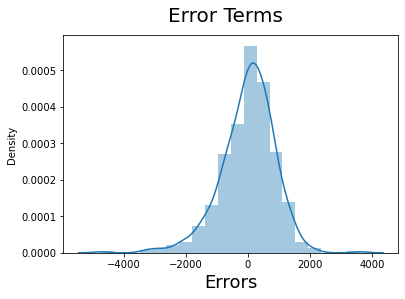

In [321]:
# Plot the histogram of the error terms
fig = plt.figure()
residuals=(y_train - y_train_bikeCnt)
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [322]:
#check shape of residuals
residuals.shape

(584,)

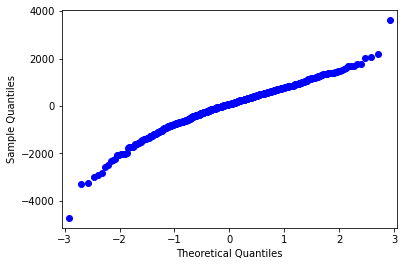

In [323]:
# QQ Plots - let’s see QQ Plots of the residuals
sm.qqplot(residuals)
plt.show()

# Homoscedasticity Check

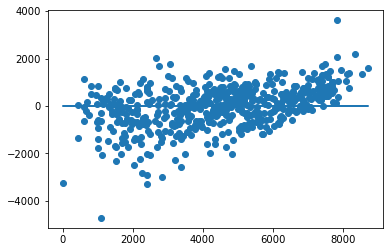

In [324]:
plt.scatter(y_train, residuals)
plt.plot(y_train, [0]*len(y_train))

- This plot clearly shows a constant variance around the zero-line.

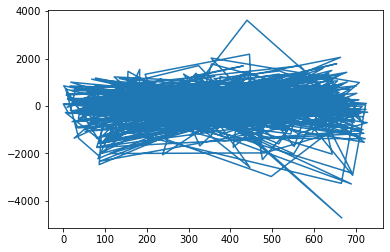

In [325]:
# Observing that the error terms are uncorrelated with each other
plt.plot(residuals.index, residuals)

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [326]:
numeric_vars=['atemp','hum','windspeed']
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

In [327]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### Dividing into X_test and y_test

In [332]:
y_test = df_test.pop('cnt')
X_test = df_test

In [334]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
219    4326
719    3623
3      1562
392    4023
360    1162
Name: cnt, Length: 146, dtype: int64

In [335]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

In [336]:
X_train_new=X_train_lm5.drop(['const'], axis=1)
finalColmns=X_train_new.columns
finalColmns

Index(['yr', 'workingday', 'windspeed', 'spring',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'Saturday', 'Dec',
       'Jan', 'Nov', 'Sep'],
      dtype='object')

In [337]:
# Creating X_test_1 dataframe by dropping variables from X_test. Will keep only selected features in Model
X_test_1= X_test[finalColmns]
X_test_1.columns

Index(['yr', 'workingday', 'windspeed', 'spring',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'Saturday', 'Dec',
       'Jan', 'Nov', 'Sep'],
      dtype='object')

In [342]:
X_test_1.shape

(146, 12)

In [341]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test_1)
X_test_1.head()

,const,yr,workingday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Saturday,Dec,Jan,Nov,Sep
184,1.0,0,0,0.084219,0,0,1,0,0,0,0,0
535,1.0,1,1,0.153728,0,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,0,0,0
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,0,0,0,0,0,0,0


In [343]:
# Making predictions using the final model
y_pred = lm5.predict(X_test_1)
y_pred

184    3659.093724
535    6972.277725
299    3768.253172
221    4544.599653
152    4199.056280
          ...     
219    4574.949077
719    2168.400668
3      1612.395401
392    3597.791778
360     763.430204
Length: 146, dtype: float64

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

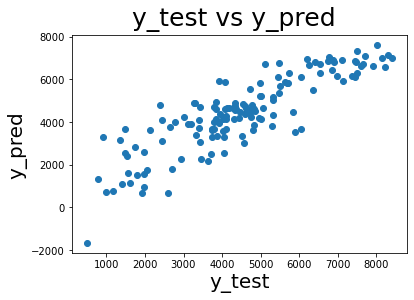

In [344]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)            
plt.xlabel('y_test', fontsize = 20)                         
plt.ylabel('y_pred', fontsize = 20)      

The Model seems good enough to predict demand of bikes. The actual and predicted value of cnt significantly overlapped. Hence, the model is able to explain the change in demand very well.

# Calculate the r square for test

In [345]:
#Import lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [346]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7421818903942987

## $ R ^2 $ score of Model on Test data is: .74. Our model describes 74 % of variance of our test data. 

In [347]:
print(X_train_rfe.columns)
print(lm5.summary())

Index(['yr', 'workingday', 'windspeed', 'spring',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'Saturday', 'Dec',
       'Jan', 'Nov', 'Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.44e-192
Time:                        10:06:08   Log-Likelihood:                -4784.1
No. Observations:                 584   AIC:                             9592.
Df Residuals:                     572   BIC:                             9645.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              

## Adjusted $ 𝑅^2 $ score of Model on Train data is: .80. Our model describes 80 % of variance of our train data.¶

### We can see that the equation for best fitted line is:
#### $ cnt=4591.90+ 2103.10*yr + 545.78*workingday -1746.54*windspeed -2049.78*spring -2770.76*Light rain_Light snow_Thunderstorm -785.71*Mist_Cloudy -990.01*Dec - 0.102*Jan -1032.47*Nov + 583.41*Sep $


### Conclusion:
#### We can see the demand for bikes depends mainly on below variables:

 - yr , workingday ,Dec, Jan,Nov,Sep
 
##### Weather related fetaures

- windspeed ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm

 #### Demand Increases :
- With Year
- On Working Day
- In month of Sep
#### Demand Decreases:
- windspeed ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm
- In months of Dec, Jan,Nov i.e 'Winter'
